# **1. 종목 추리기**

In [ ]:
!pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 13.7 MB/s eta 0:00:00


In [ ]:
!pip install bt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 45.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bt: filename=bt-0.2.9-cp39-cp39-linux_x86_64.whl size=1188196 sha256=e8373dcf48b2917c6da45ec6c83d50b8d414cab04cf72f9de5f4462d90d3da2c
  Stored in directory: /root/.cache/pip/wheels/94/27/2d/9d6f4170a0a76f7b431cc3008624c6b4221eb7221d85076e1b
Successfully built bt


In [ ]:
import pandas as pd
import numpy as np
from pykrx import stock
import bt
from datetime import datetime

In [ ]:
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="KOSPI")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))
 

In [ ]:
stock_fud = pd.DataFrame(stock.get_market_fundamental_by_ticker(date='20230102', market="KOSPI"))
stock_fud = stock_fud.reset_index()
stock_fud.rename(columns={'티커':'종목코드'}, inplace=True)

In [ ]:
result = pd.merge(stock_list, stock_fud, left_on='종목코드', right_on='종목코드', how='outer')

In [ ]:
stock_price = stock.get_market_ohlcv_by_ticker(date='20211119', market="ALL")
stock_price = stock_price.reset_index()
stock_price.rename(columns={'티커':'종목코드'}, inplace=True)

result1 = pd.merge(result, stock_price, left_on='종목코드', right_on='종목코드', how='outer')
result1['내재가치'] = (result1['BPS'] + (result1['EPS']) * 10) / 2
result1['내재가치/종가'] = (result1['내재가치'] / result1['종가'])
result1 = result1.replace([0], np.nan)
result1 = result1.dropna(axis=0)


In [ ]:
perpd = result1['PER'] < 5
pbrpd = result1['PBR'] < 0.5
inner_val = result1['내재가치/종가'] > 2
result2 = result1[perpd & pbrpd & inner_val]

In [ ]:
result2

,종목코드,종목명,BPS,PER,PBR,EPS,DIV,DPS,시가,고가,저가,종가,거래량,거래대금,등락률,내재가치,내재가치/종가
4,138930,BNK금융지주,28745.0,2.69,0.22,2341.0,8.89,560.0,8420.0,8500.0,8400.0,8470.0,1000869.0,8.461774e+09,-0.59,26077.5,3.078808
16,000590,CS홀딩스,226165.0,4.50,0.25,12789.0,0.87,500.0,61500.0,61600.0,60700.0,61300.0,3180.0,1.940961e+08,0.66,177027.5,2.887887
18,016610,DB금융투자,22133.0,1.43,0.18,2831.0,12.35,500.0,6990.0,7010.0,6910.0,6960.0,74761.0,5.207484e+08,-0.29,25221.5,3.623779
22,139130,DGB금융지주,32507.0,2.34,0.21,2886.0,9.33,630.0,9550.0,9610.0,9460.0,9510.0,488547.0,4.652181e+09,-1.04,30683.5,3.226446
24,000210,DL,173922.0,1.37,0.33,41881.0,3.32,1900.0,61700.0,62100.0,60800.0,61400.0,59791.0,3.674429e+09,-0.16,296366.0,4.826808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,002320,한진,84534.0,1.90,0.24,10804.0,2.92,600.0,31700.0,31800.0,31350.0,31600.0,13066.0,4.131298e+08,-0.47,96287.0,3.047057
869,000880,한화,52527.0,2.59,0.48,9781.0,2.96,750.0,32050.0,32500.0,32000.0,32450.0,288219.0,9.297045e+09,1.41,75168.5,2.316441
897,004560,현대비앤지스틸,32770.0,2.22,0.31,4595.0,0.98,100.0,16000.0,16350.0,15850.0,16150.0,125005.0,2.005356e+09,0.31,39360.0,2.437152
905,004020,현대제철,135836.0,2.74,0.22,11110.0,3.28,1000.0,40150.0,41100.0,40100.0,40400.0,506477.0,2.055000e+10,1.00,123468.0,3.056139


In [ ]:
stock_code = result2['종목코드']
stock_code = np.array(stock_code)
stock_code

array(['138930', '000590', '016610', '139130', '000210', '001880',
       '017940', '078930', '060980', '175330', '105560', '001940',
       '025000', '092230', '093050', '005940', '005490', '018670',
       '006120', '003570', '036530', '000860', '013580', '002240',
       '030610', '007690', '002990', '024110', '030210', '023590',
       '003540', '084010', '001130', '016090', '082640', '002690',
       '008420', '085620', '003650', '001270', '003960', '002170',
       '001430', '003030', '029530', '004970', '055550', '002030',
       '316140', '001200', '139480', '029460', '002020', '003240',
       '005810', '086790', '036460', '071050', '000970', '104700',
       '034830', '010100', '004960', '001750', '002220', '002320',
       '000880', '004560', '004020', '002460'], dtype=object)

# **2. 전처리**

In [ ]:
a = ['.KS']

b = stock_code
ab=[]
for i in range(len(b)):
    ab.append(str(b[i])+a[0])
print (ab)

['138930.KS', '000590.KS', '016610.KS', '139130.KS', '000210.KS', '001880.KS', '017940.KS', '078930.KS', '060980.KS', '175330.KS', '105560.KS', '001940.KS', '025000.KS', '092230.KS', '093050.KS', '005940.KS', '005490.KS', '018670.KS', '006120.KS', '003570.KS', '036530.KS', '000860.KS', '013580.KS', '002240.KS', '030610.KS', '007690.KS', '002990.KS', '024110.KS', '030210.KS', '023590.KS', '003540.KS', '084010.KS', '001130.KS', '016090.KS', '082640.KS', '002690.KS', '008420.KS', '085620.KS', '003650.KS', '001270.KS', '003960.KS', '002170.KS', '001430.KS', '003030.KS', '029530.KS', '004970.KS', '055550.KS', '002030.KS', '316140.KS', '001200.KS', '139480.KS', '029460.KS', '002020.KS', '003240.KS', '005810.KS', '086790.KS', '036460.KS', '071050.KS', '000970.KS', '104700.KS', '034830.KS', '010100.KS', '004960.KS', '001750.KS', '002220.KS', '002320.KS', '000880.KS', '004560.KS', '004020.KS', '002460.KS']


# **3. 백테스팅**

In [ ]:
!pip install backtesting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173817 sha256=576b1c756f3114fbdf8630225426f41cc7f80ee08dc42aa836da16c25fbef995
  Stored in directory: /root/.cache/pip/wheels/3f/7c/24/f8816cdb5359accfe50ebbb023baf41e98592f11528ed26ce6
Successfully built backtesting


In [ ]:
pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr

In [ ]:
tiker_list = ['138930', '000590', '016610', '139130', '000210', '001880','017940', '078930', '060980', '175330', '105560', '001940','025000', '092230', '093050', '005940', '005490', 
              '018670','006120', '003570', '036530', '000860', '013580', '002240','030610', '007690', '002990', '024110', '030210', '023590','003540', '084010', '001130', '016090', 
              '082640', '002690','008420', '085620', '003650', '001270', '003960', '002170','001430', '003030', '029530', '004970', '055550', '002030','316140', '001200', '139480', 
              '029460', '002020', '003240','005810', '086790', '036460', '071050', '000970', '104700','034830', '010100', '004960', '001750', '002220', '002320','000880', '004560', 
              '004020', '002460']

df_list = [fdr.DataReader(ticker, '2021-01-01',  '2022-01-01') for ticker in tiker_list]

len(df_list)

70

In [ ]:
df_list

[            Open  High   Low  Close   Volume    Change
 Date                                                  
 2021-01-04  5650  5660  5510   5560  2067437 -0.021127
 2021-01-05  5510  5590  5480   5580  2758276  0.003597
 2021-01-06  5590  5670  5520   5570  6467687 -0.001792
 2021-01-07  5720  5790  5670   5780  3856777  0.037702
 2021-01-08  5830  5840  5710   5780  3213667  0.000000
 ...          ...   ...   ...    ...      ...       ...
 2021-12-24  8850  8880  8810   8850  1120573  0.003401
 2021-12-27  8830  8890  8780   8800  1296208 -0.005650
 2021-12-28  8810  8970  8760   8940  3963694  0.015909
 2021-12-29  8550  8590  8370   8400  3348510 -0.060403
 2021-12-30  8380  8430  8350   8400  1058390  0.000000
 
 [248 rows x 6 columns],
              Open   High    Low  Close  Volume    Change
 Date                                                    
 2021-01-04  59300  59500  58400  59100    3900  0.001695
 2021-01-05  58800  60700  58500  59700    6892  0.010152
 2021-01-06  

In [ ]:
df_list[0]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,5650,5660,5510,5560,2067437,-0.021127
2021-01-05,5510,5590,5480,5580,2758276,0.003597
2021-01-06,5590,5670,5520,5570,6467687,-0.001792
2021-01-07,5720,5790,5670,5780,3856777,0.037702
2021-01-08,5830,5840,5710,5780,3213667,0.000000
...,...,...,...,...,...,...
2021-12-24,8850,8880,8810,8850,1120573,0.003401
2021-12-27,8830,8890,8780,8800,1296208,-0.005650
2021-12-28,8810,8970,8760,8940,3963694,0.015909


In [ ]:
# df = pd.concat(df_list, axis=1)

# df.columns = ['138930', '000590', '016610', '139130', '000210', '001880','017940', '078930', '060980', '175330', '105560', '001940','025000', '092230', '093050', '005940', '005490', '018670','006120', '003570', '036530', '000860', '013580', '002240','030610', '007690', '002990', '024110', '030210', '023590','003540', '084010', '001130', '016090', '082640', '002690','008420', '085620', '003650', '001270', '003960', '002170','001430', '003030', '029530', '004970', '055550', '002030','316140', '001200', '139480', '029460', '002020', '003240','005810', '086790', '036460', '071050', '000970', '104700','034830', '010100', '004960', '001750', '002220', '002320','000880', '004560', '004020', '002460']

# df = df.dropna()

# df.head(10)

In [ ]:
df1 = fdr.DataReader('001040', '2022-01-01',  '2023-01-01')
df1


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,83800,84600,83400,84000,27216,0.007194
2022-01-04,83300,84000,82900,84000,27011,0.000000
2022-01-05,83100,83900,82300,82900,61001,-0.013095
2022-01-06,82300,82600,81000,81300,77317,-0.019300
2022-01-07,81000,82000,80600,81900,43418,0.007380
...,...,...,...,...,...,...
2022-12-23,84800,85300,82000,84000,37980,-0.009434
2022-12-26,83500,84600,82000,83000,32627,-0.011905
2022-12-27,82600,83500,82000,83300,64861,0.003614


In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA

class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 5)
        self.ma2 = self.I(SMA, price, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

/usr/local/lib/python3.9/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [ ]:
test = fdr.DataReader('005490', '2022-01-01',  '2023-01-01')
test
bt = Backtest(test, SmaCross, commission=.001, cash=1000000,
              exclusive_orders=True)
stats = bt.run()
print("---------- POSCO Holdings (005490) ----------")
print(stats)
bt.plot()

---------- POSCO Holdings (005490) ----------
Start                     2022-01-03 00:00:00
End                       2022-12-29 00:00:00
Duration                    360 days 00:00:00
Exposure Time [%]                   88.617886
Equity Final [$]                    1028641.5
Equity Peak [$]                     1094871.0
Return [%]                            2.86415
Buy & Hold Return [%]                   -1.25
Return (Ann.) [%]                    2.935023
Volatility (Ann.) [%]               23.007959
Sharpe Ratio                         0.127566
Sortino Ratio                        0.210113
Calmar Ratio                         0.124311
Max. Drawdown [%]                  -23.610231
Avg. Drawdown [%]                   -5.934601
Max. Drawdown Duration      231 days 00:00:00
Avg. Drawdown Duration       45 days 00:00:00
# Trades                                   17
Win Rate [%]                        23.529412
Best Trade [%]                      18.800119
Worst Trade [%]                  

Row(id='1449', ...)

In [ ]:
test1 = fdr.DataReader('001230', '2022-01-01',  '2023-01-01')
test
bt = Backtest(test1, SmaCross, commission=.001, cash=1000000,
              exclusive_orders=True)
stats = bt.run()
print("---------- Dongkuk Steel (001230) ----------")
#print(stats)
bt.plot()

---------- Dongkuk Steel (001230) ----------


Row(id='2181', ...)

In [ ]:
df2 = fdr.DataReader('055550', '2022-01-01',  '2023-01-01')
df2


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,36700,37450,36700,37250,1090787,0.012228
2022-01-04,37300,37600,37200,37600,1128934,0.009396
2022-01-05,37800,37950,37300,37500,1473096,-0.002660
2022-01-06,37650,37850,37150,37300,1232985,-0.005333
2022-01-07,37300,37650,36900,37650,1126929,0.009383
...,...,...,...,...,...,...
2022-12-23,37900,38100,37450,37550,628655,-0.009235
2022-12-26,37550,37650,37150,37200,665781,-0.009321
2022-12-27,37500,37750,37150,37600,1464084,0.010753


In [ ]:
bt = Backtest(df1, SmaCross, commission=.001, cash=1000000,
              exclusive_orders=True)
stats = bt.run()
print("---------- CJ Corp (001040) ----------")
print(stats)
bt.plot()

---------- CJ Corp (001040) ----------
Start                     2022-01-03 00:00:00
End                       2022-12-29 00:00:00
Duration                    360 days 00:00:00
Exposure Time [%]                   90.243902
Equity Final [$]                    1028899.2
Equity Peak [$]                     1072543.3
Return [%]                            2.88992
Buy & Hold Return [%]                0.119048
Return (Ann.) [%]                     2.96144
Volatility (Ann.) [%]               21.440956
Sharpe Ratio                         0.138121
Sortino Ratio                        0.203747
Calmar Ratio                         0.271838
Max. Drawdown [%]                  -10.894115
Avg. Drawdown [%]                   -6.146174
Max. Drawdown Duration      132 days 00:00:00
Avg. Drawdown Duration       46 days 00:00:00
# Trades                                   11
Win Rate [%]                        63.636364
Best Trade [%]                       6.518482
Worst Trade [%]                     -5.88

Row(id='2913', ...)

In [ ]:
bt = Backtest(df2, SmaCross, commission=.001, cash=1000000,
              exclusive_orders=True)

stats = bt.run()
print("----- Shinhan Financial Group (055550) -----")
print(stats)
bt.plot()


----- Shinhan Financial Group (055550) -----
Start                     2022-01-03 00:00:00
End                       2022-12-29 00:00:00
Duration                    360 days 00:00:00
Exposure Time [%]                   90.650407
Equity Final [$]                     818706.8
Equity Peak [$]                    1059619.55
Return [%]                          -18.12932
Buy & Hold Return [%]               -5.503356
Return (Ann.) [%]                  -18.527775
Volatility (Ann.) [%]               17.801991
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -28.423206
Avg. Drawdown [%]                   -8.781405
Max. Drawdown Duration      167 days 00:00:00
Avg. Drawdown Duration       64 days 00:00:00
# Trades                                   21
Win Rate [%]                        28.571429
Best Trade [%]                      13.627219
Worst Trade [%]                    

Row(id='3645', ...)

In [ ]:
df3 = fdr.DataReader('007070', '2018-01-01',  '2023-01-01')

bt = Backtest(df3, SmaCross, commission=.001, cash=1000000,
              exclusive_orders=True)
stats = bt.run()
print("--------- GS Retail(007070) ---------")
print(stats)
bt.plot()

--------- GS Retail(007070) ---------
Start                     2018-01-02 00:00:00
End                       2022-12-29 00:00:00
Duration                   1822 days 00:00:00
Exposure Time [%]                   98.214286
Equity Final [$]                    1238811.6
Equity Peak [$]                    1530068.25
Return [%]                           23.88116
Buy & Hold Return [%]              -30.835381
Return (Ann.) [%]                    4.477748
Volatility (Ann.) [%]               30.791087
Sharpe Ratio                         0.145424
Sortino Ratio                        0.235536
Calmar Ratio                         0.120814
Max. Drawdown [%]                  -37.063027
Avg. Drawdown [%]                   -7.131835
Max. Drawdown Duration      591 days 00:00:00
Avg. Drawdown Duration       74 days 00:00:00
# Trades                                   70
Win Rate [%]                             40.0
Best Trade [%]                       26.71035
Worst Trade [%]                     -12.50

Row(id='4377', ...)

In [ ]:
df4 = fdr.DataReader('139480', '2018-01-01',  '2023-01-01')

bt = Backtest(df4, SmaCross, commission=.001, cash=1000000,
              exclusive_orders=True)
stats = bt.run()
print("------------- Emart (139480) -------------")
print(stats)
bt.plot()

------------- Emart (139480) -------------
Start                     2018-01-02 00:00:00
End                       2022-12-29 00:00:00
Duration                   1822 days 00:00:00
Exposure Time [%]                   96.185065
Equity Final [$]                     482534.1
Equity Peak [$]                     1050140.5
Return [%]                          -51.74659
Buy & Hold Return [%]               -62.59542
Return (Ann.) [%]                  -13.847657
Volatility (Ann.) [%]               24.354844
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -64.730719
Avg. Drawdown [%]                  -22.413454
Max. Drawdown Duration     1738 days 00:00:00
Avg. Drawdown Duration      582 days 00:00:00
# Trades                                   81
Win Rate [%]                        34.567901
Best Trade [%]                      21.032143
Worst Trade [%]                    -1

Row(id='5109', ...)

In [ ]:
df4 = fdr.DataReader('011790', '2022-01-01',  '2023-01-01')

bt = Backtest(df4, SmaCross, commission=.001, cash=1000000,
              exclusive_orders=True)
stats = bt.run()
print("------------- SKC (011790) -------------")
print(stats)
bt.plot()

------------- SKC (011790) -------------
Start                     2022-01-03 00:00:00
End                       2022-12-29 00:00:00
Duration                    360 days 00:00:00
Exposure Time [%]                   83.333333
Equity Final [$]                    1631213.5
Equity Peak [$]                     1631213.5
Return [%]                           63.12135
Buy & Hold Return [%]              -47.787611
Return (Ann.) [%]                   65.079824
Volatility (Ann.) [%]               59.624568
Sharpe Ratio                         1.091493
Sortino Ratio                        2.932948
Calmar Ratio                         5.285187
Max. Drawdown [%]                  -12.313627
Avg. Drawdown [%]                   -5.529335
Max. Drawdown Duration       44 days 00:00:00
Avg. Drawdown Duration       16 days 00:00:00
# Trades                                   12
Win Rate [%]                        58.333333
Best Trade [%]                      26.568905
Worst Trade [%]                     -8.

Row(id='11697', ...)

In [ ]:
df5 = fdr.DataReader('009830', '2022-01-01',  '2023-01-01')

bt = Backtest(df5, SmaCross, commission=.001, cash=1000000,
              exclusive_orders=True)
stats = bt.run()
print("--------- Hanhwa Solution (009830) ---------")
print(stats)
bt.plot()

--------- Hanhwa Solution (009830) ---------
Start                     2022-01-03 00:00:00
End                       2022-12-29 00:00:00
Duration                    360 days 00:00:00
Exposure Time [%]                   84.146341
Equity Final [$]                  1184865.088
Equity Peak [$]                   1536845.433
Return [%]                          18.486509
Buy & Hold Return [%]               20.957341
Return (Ann.) [%]                   18.977737
Volatility (Ann.) [%]               52.611473
Sharpe Ratio                         0.360715
Sortino Ratio                        0.702613
Calmar Ratio                         0.606217
Max. Drawdown [%]                  -31.305188
Avg. Drawdown [%]                   -7.355262
Max. Drawdown Duration      105 days 00:00:00
Avg. Drawdown Duration       24 days 00:00:00
# Trades                                   16
Win Rate [%]                            43.75
Best Trade [%]                      34.390417
Worst Trade [%]                    

Row(id='12429', ...)

In [ ]:
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.font_manager as font_manager
from matplotlib import rc

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
mpl.rc("font", family='AppleGothic')

In [ ]:
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

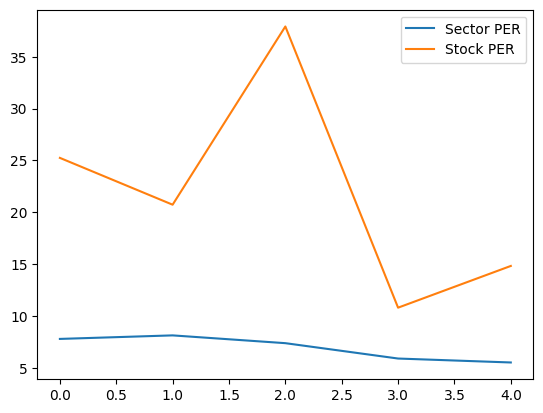

In [ ]:
a = pd.DataFrame({'Sector PER':[7.81,	8.15,	7.40,	5.92,	5.54],
                             'Stock PER':[25.25,	20.74,	37.91,	10.82,	14.84 ]})
a.plot()
plt.show()                       

In [ ]:
b = stock.get_market_fundamental("20180101", "20230101", "001040")
print("CJ")
b

CJ


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2018-01-02,118834,22.52,1.49,7837,0.76,1350
2018-01-03,118834,22.71,1.50,7837,0.76,1350
2018-01-04,118834,22.46,1.48,7837,0.77,1350
2018-01-05,118834,22.27,1.47,7837,0.77,1350
2018-01-08,118834,22.14,1.46,7837,0.78,1350
...,...,...,...,...,...,...
2022-12-23,151085,10.25,0.56,8197,2.74,2300
2022-12-26,151085,10.13,0.55,8197,2.77,2300
2022-12-27,151085,10.16,0.55,8197,2.76,2300


In [ ]:
c = stock.get_market_fundamental("20180101", "20230101", "009830")
print("Hanhwa Solution")
c

Hanhwa Solution


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2018-01-02,31850,7.07,1.02,4604,1.08,350
2018-01-03,31850,7.15,1.03,4604,1.06,350
2018-01-04,31850,7.06,1.02,4604,1.08,350
2018-01-05,31850,7.32,1.06,4604,1.04,350
2018-01-08,31850,7.33,1.06,4604,1.04,350
...,...,...,...,...,...,...
2022-12-23,42563,13.72,1.07,3320,0.00,0
2022-12-26,42563,13.69,1.07,3320,0.00,0
2022-12-27,42563,13.51,1.05,3320,0.00,0


In [ ]:
d = stock.get_market_fundamental("20180101", "20230101", "011790")
print("SKC")
d

SKC


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2018-01-02,37457,40.02,1.24,1162,1.61,750
2018-01-03,37457,42.17,1.31,1162,1.53,750
2018-01-04,37457,41.31,1.28,1162,1.56,750
2018-01-05,37457,40.40,1.25,1162,1.60,750
2018-01-08,37457,41.74,1.29,1162,1.55,750
...,...,...,...,...,...,...
2022-12-23,55782,14.97,1.66,6174,1.19,1100
2022-12-26,55782,15.03,1.66,6174,1.19,1100
2022-12-27,55782,15.05,1.67,6174,1.18,1100
